In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
plt.rcParams['font.size'] = 14

In [3]:
import py_block_diagram

In [4]:
import importlib

In [5]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [6]:
import py_block_diagram as pybd

## Test Case 1: Simple Feedback Loop

- the feedback loop is called out explicitly

In [7]:
U = pybd.input_block("$U(s)$")

In [8]:
sum1 = pybd.summing_junction(U,radius=0.35)

In [9]:
U.place_absolute(0,0)

In [10]:
sum1.place_relative(U,"right")

In [11]:
D = pybd.TF_block("$D(s)$", sum1)

In [12]:
D.place_relative(sum1, "right",3.5)

In [13]:
D.input

In [14]:
G = pybd.TF_block("$G(s)$",D)

In [15]:
G.place_relative(D,"right",5)

In [16]:
Y = pybd.output_block("$Y(s)$",G)
Y.place_relative(G, "right",6)

In [17]:
sum1.input2 = G

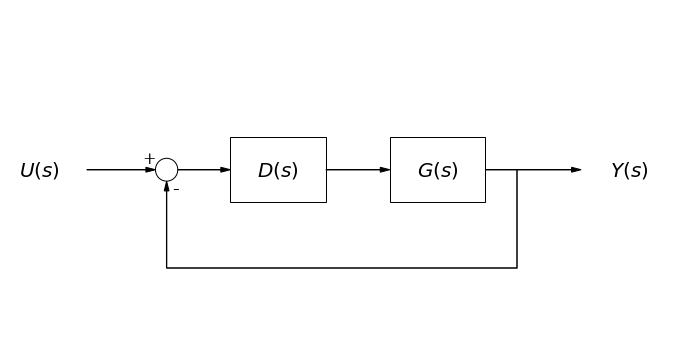

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
mysys = pybd.block_diagram([U,sum1,D,G,Y],ax)
mysys.draw()
plt.xlim([-1,20])
plt.ylim([-5,5])
mysys.axis_off()

## Test Case 2: ZOH Block in Feedback Loop

In [19]:
U2 = pybd.input_block("$U(s)$")

In [20]:
sum2 = pybd.summing_junction(U2,radius=0.35)

In [21]:
U2.place_absolute(0,0)

In [22]:
sum2.place_relative(U2,"right")

In [23]:
D2 = pybd.TF_block("$D(s)$", sum2)

In [24]:
D2.place_relative(sum2, "right",3.5)

In [25]:
G2 = pybd.TF_block("$G(s)$",D2)

In [26]:
G2.place_relative(D2,"right",5)

In [27]:
Y2 = pybd.output_block("$Y(s)$",G2)
Y2.place_relative(G2, "right",6)

In [28]:
Z = pybd.TF_block('$Z^{-1}$')

In [29]:
Z.place_relative(G2,'below',xshift=-2.5)

In [30]:
Z.input = G2

In [31]:
sum2.input2 = Z

In [32]:
sum2.draw_feedback_loop = False

In [33]:
Z.guess_wire_style()
Z.wire_style

'vh'

In [34]:
Z.wire_start = (G2.x + G2.width*0.5 + 1, G2.y)
Z.wire_start

(15.0, 0)

In [35]:
Z.guess_wire_end()
Z.wire_end

(11.5, -4)

### Issues

- summing juntion should not draw the feedback loop in this case
    - how do we tell that to the system or the summing junction?
- need to work on wires related to ZOH in FB loop

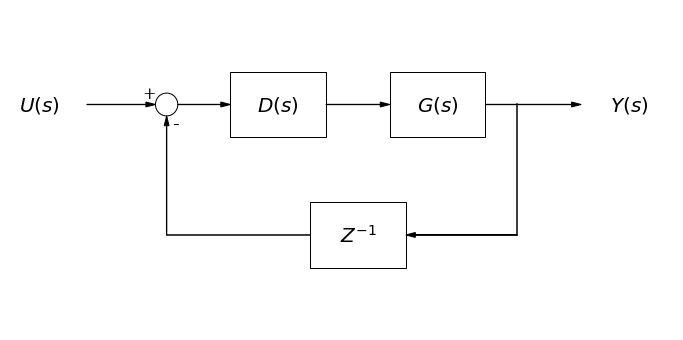

In [36]:
fig2 = plt.figure(figsize=(12,6))
ax2 = fig2.add_subplot(111)
mysys2 = pybd.block_diagram([U2,sum2,D2,G2,Y2, Z],ax2)
mysys2.draw()
sum2.draw_input2_wire(ax2)
plt.xlim([-1,20])
plt.ylim([-7,3])
mysys2.axis_off()